In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functions to update and compute the output


In [3]:
def update_network(leaking_rate,time_constant,X,y_fb,u,W,Wfb,Win,f):
    return (1-leaking_rate*time_constant) * X + time_constant * f(Win.dot(u)+W.dot(X) + Wfb.dot(y_fb) + np.random.randn(*y_fb.shape)*0.001)

def compute_output(X,Wout):
    return Wout.T.dot(X)
    #return np.tanh(Wout.T.dot(X))

# Initialization of the network

In [4]:
N = 100
X = np.random.rand(N) - 0.5
W = np.random.rand(N,N) - 0.5
Wbf = (np.random.rand(N,1) - 0.5)
Win = (np.random.rand(N,14) - 0.5)
rhoW = np.max(np.abs(np.linalg.eig(W)[0]))
W *= 0.2 / rhoW
leaking_rate = 0.9
time_constant = 0.06

# Objective function

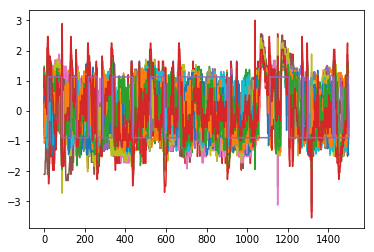

In [5]:
data = pd.read_csv("../data/EEG_SAX.csv",index_col=0)
y = (data.label - data.label.mean())*1./data.label.std()
u = data.drop('label', 1)
u = (u-u.mean())*1./u.std()
_ = plt.plot(range(len(u)),u)
_ = plt.plot(range(len(y)),y)
u = u.values
y = y.values
y = y.reshape(y.shape[0],1)

In [6]:
training_size = 800
rest_size = 100
data_size = 1500

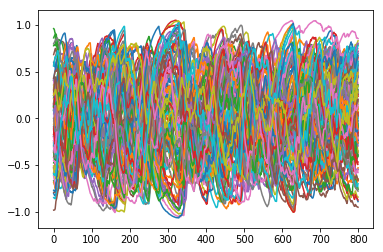

In [7]:

X_full = np.ones((training_size,N))
for i in range(rest_size):
    X = update_network(leaking_rate,time_constant,X,y[i],u[i],W,Wbf,Win,np.tanh)

for i in range(training_size):
    X_full[i,:] = X
    X = update_network(leaking_rate,time_constant,X,y[i+rest_size-1],u[i+rest_size],W,Wbf,Win,np.tanh)
_=plt.plot(pd.DataFrame(X_full))

# Use pseudo inverse to compute $W^{out}$

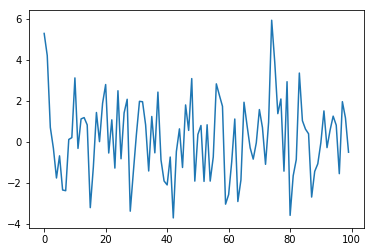

In [8]:
Wout = np.linalg.pinv(X_full).dot(y[rest_size:training_size+rest_size,:])#np.arctanh(y[:training_size,:]))Wout = np.linalg.pinv(X_full).dot(y[rest_size:training_size+rest_size,:])#np.arctanh(y[:training_size,:]))
#Wout = np.linalg.pinv(X_full).dot(np.arctanh(y[rest_size:training_size+rest_size,:]))#y[:training_size,:]))
_=plt.plot(pd.DataFrame(Wout))

# plot objective function and predicted function

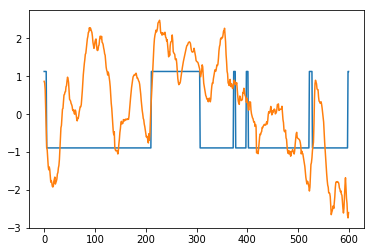

In [9]:
ans = []
test_size = data_size-training_size-rest_size
for i in range(test_size):
    X = update_network(leaking_rate,time_constant,X,y[i+training_size+rest_size-1],u[i+training_size+rest_size-1],W,Wbf,Win,np.tanh)
    ans.append(compute_output(X,Wout))

_ = plt.plot(range(test_size),y[training_size+rest_size:])
_ = plt.plot(range(test_size),ans)

(-1, 1)

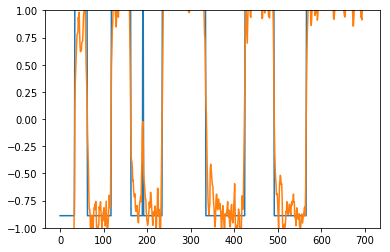

In [10]:
ans = []
for i in range(training_size-rest_size):
    X = update_network(leaking_rate,time_constant,X,y[i+rest_size-1],u[i+rest_size-1],W,Wbf,Win,np.tanh)
    ans.append(compute_output(X,Wout))

_ = plt.plot(range(training_size-rest_size),y[rest_size:training_size])
_ = plt.plot(range(training_size-rest_size),ans)
plt.ylim(-1,1)

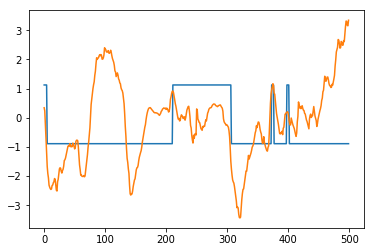

In [94]:
ans = []
test_size = 500
for i in range(test_size):
    if i < 100:
        X = update_network(leaking_rate,time_constant,X,y[i+training_size+rest_size-1],u[i+training_size+rest_size],W,Wbf,Win,np.tanh)
    else:
        X = update_network(leaking_rate,time_constant,X,ans[i-1],u[i+training_size+rest_size],W,Wbf,Win,np.tanh)
    ans.append(compute_output(X,Wout))

_ = plt.plot(range(test_size),y[training_size+rest_size:training_size+rest_size+test_size])
_ = plt.plot(range(test_size),ans)